In [21]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [23]:
consumer_key = "6QQynMmE0Vl9lKRo3wetaMBt5"
consumer_secret = "3Lb10oaXTS2eoRXY5uxpU11FrzG0MTxS0T3CCb6oXsQEJDIWzD"
access_token = "922956228296433666-rRreYAg3jq4OkDws8wrUKF1TDFWT0I4"
access_token_secret = "TSzYacIxtDi11Gknc9ExwRTDPg2tUQn6HBdZH5ZlyvLCT"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
target_user = ["@nytimes", "@CNN", "@FoxNews", "@CBS", "@BBC"]
sentiments = []

In [25]:
# Get all tweets from home feed
for user in target_user:
    counter = 0
    for x in range(5):
        public_tweets = api.user_timeline(user, page = x)
    # Loop through all tweets 
        for tweet in public_tweets:

        #Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            counter = counter + 1
        # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"],
                               "Text": tweet["text"],
                           "Screen Name": tweet["user"]["screen_name"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        

In [27]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Screen Name,Text,Tweets Ago
0,0.0000,Fri Nov 03 21:25:09 +0000 2017,1.000,0.000,0.000,nytimes,A pizza for fall https://t.co/RSFwlnaLJK,1
1,0.0000,Fri Nov 03 21:10:02 +0000 2017,1.000,0.000,0.000,nytimes,"Sushi dinners, paid travel and Lego ducks: How...",2
2,0.2975,Fri Nov 03 21:02:03 +0000 2017,0.885,0.000,0.115,nytimes,An NBA player with a 7-foot-3 wingspan is defy...,3
3,0.0000,Fri Nov 03 20:55:04 +0000 2017,1.000,0.000,0.000,nytimes,Does Leonardo da Vinci's work belong in an auc...,4
4,-0.8519,Fri Nov 03 20:40:11 +0000 2017,0.636,0.364,0.000,nytimes,RT @NYTSports: Runners in the New York City Ma...,5
5,-0.4588,Fri Nov 03 20:34:28 +0000 2017,0.864,0.136,0.000,nytimes,New York police are building a case against Ha...,6
6,0.0000,Fri Nov 03 20:33:03 +0000 2017,1.000,0.000,0.000,nytimes,How a 19-year-old became the nation’s first Yo...,7
7,-0.3400,Fri Nov 03 20:23:31 +0000 2017,0.844,0.156,0.000,nytimes,Spain issued an arrest warrant for Catalonia’s...,8
8,-0.5859,Fri Nov 03 20:10:11 +0000 2017,0.696,0.304,0.000,nytimes,President Trump's response to Bowe Bergdahl's ...,9
9,-0.4939,Fri Nov 03 20:02:06 +0000 2017,0.686,0.314,0.000,nytimes,How Bill de Blasio overcame the haters https:/...,10


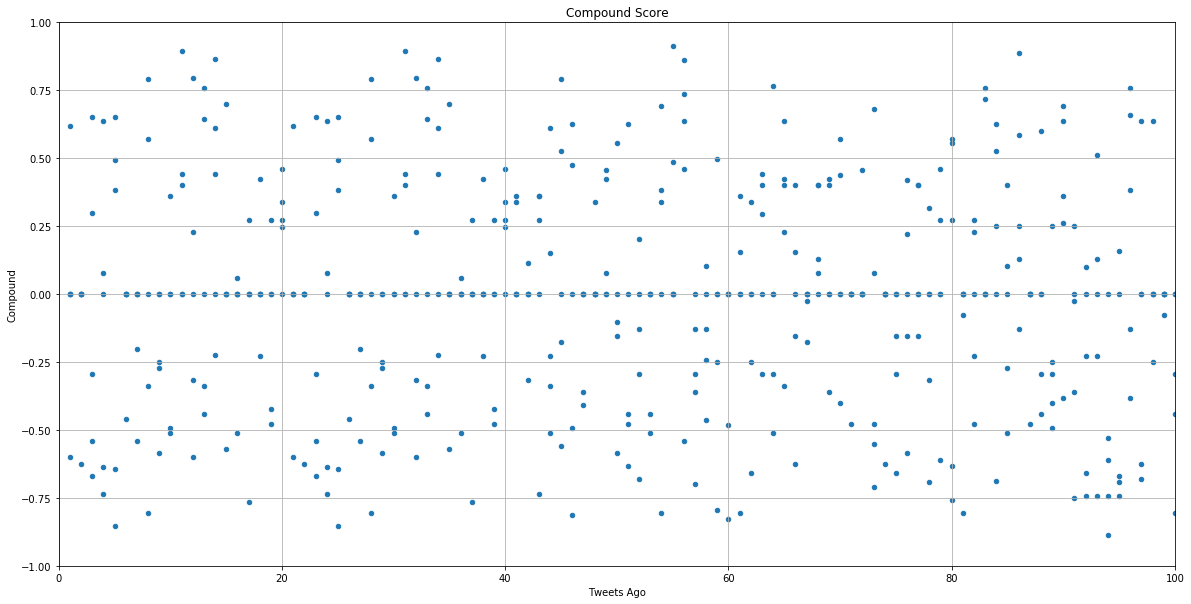

In [28]:
sentiments_pd.plot(kind="scatter", x="Tweets Ago", y="Compound", grid=True, figsize=(20,10),
              title="Compound Score")
plt.xlim(0,100)
plt.ylim(-1,1)
plt.show()

In [44]:
compound_bar = []

cnn_group = sentiments_pd[sentiments_pd["Screen Name"] == "CNN"]
cnn_com = cnn_group['Compound'].mean()

bbc_group = sentiments_pd[sentiments_pd["Screen Name"] == "BBC"]
bbc_com = bbc_group['Compound'].mean()

ny_group = sentiments_pd[sentiments_pd["Screen Name"] == "nytimes"]
ny_com = ny_group['Compound'].mean()

fox_group = sentiments_pd[sentiments_pd["Screen Name"] == "FoxNews"]
fox_com = fox_group['Compound'].mean()

cbs_group = sentiments_pd[sentiments_pd["Screen Name"] == "CBS"]
cbs_com = cbs_group['Compound'].mean()

compound_df = pd.DataFrame({
    "Twitter Handles":["CNN","BBC","NYTimes","Fox News","CBS"],
    "Compound Sentiment Score":[cnn_com, bbc_com, ny_com, fox_com, cbs_com]})

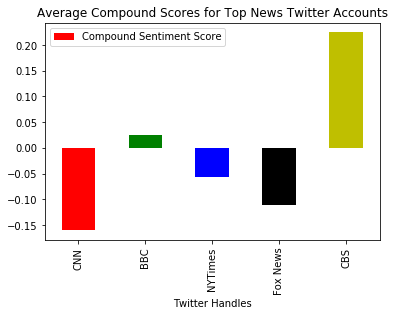

In [50]:
my_colors = 'rgbkymc'
compound_df.plot.bar(x = "Twitter Handles", y = "Compound Sentiment Score", color = my_colors, title = "Average Compound Scores for Top News Twitter Accounts")
plt.show()